In [1]:
import pandas as pd
import numpy as np
from sklearn import tree
import os

os.makedirs('out', exist_ok=True)

### Google Colabを利用する場合は、次のセルの全行の#を1つ削除して実行する

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

## データフレームへの読み込み
## Google DriveのColab Notebooksにダウンロードしたフォルダ(markegint)をセットすることを想定
#iPath = '/content/drive/MyDrive/Colab Notebooks/marketing/Chapter_4/in/'
#iFile=iPath+'sec4-3data.csv'

## データの読み込み
#df_tree = pd.read_csv(iFile)

## 先頭5行の出力
#df_tree.head()

## 決定木で日本語表示するためにフォントをインストール
#!apt-get -y install fonts-ipafont-gothic


In [2]:
# 決定木分析用データの読み込み（健康食品のこうばいの有無とモニタ属性）
df_tree = pd.read_csv('in/sec4-3data.csv')

# 最初の5行の出力
df_tree.head()

,モニタ,購入数,購入の有無,性別,年代,未既婚,乳幼児有無,小学生有無,中高生有無,大人有無,老人有無
0,13,19,1,1,5,1,0,0,0,1,1
1,14,10,1,2,11,3,0,0,0,0,1
2,15,0,0,2,10,3,0,0,0,1,0
3,16,5,1,2,11,2,0,0,0,1,1
4,18,0,0,1,11,2,0,0,0,0,1


In [3]:
# 目的変数の設定
y = df_tree.iloc[:, 2]

# 説明変数の設定
X = df_tree.iloc[:, 3:]
# 説明変数をカテゴリ変数に変更
X = X.astype('category')

# 決定木の設定と実行
clf = tree.DecisionTreeClassifier(criterion='gini', max_depth=3)
clf_res = clf.fit(X, y)

In [4]:
# 必要なモジュールのインストール（インストールされていない場合は以下を実行）
# !pip install pydotplus
# !pip install graphviz

# graphvizはpipによるインストール以外にも本体のインストールが必要なので以下のURLからダウンロードしてインストール
# https://graphviz.org/download/



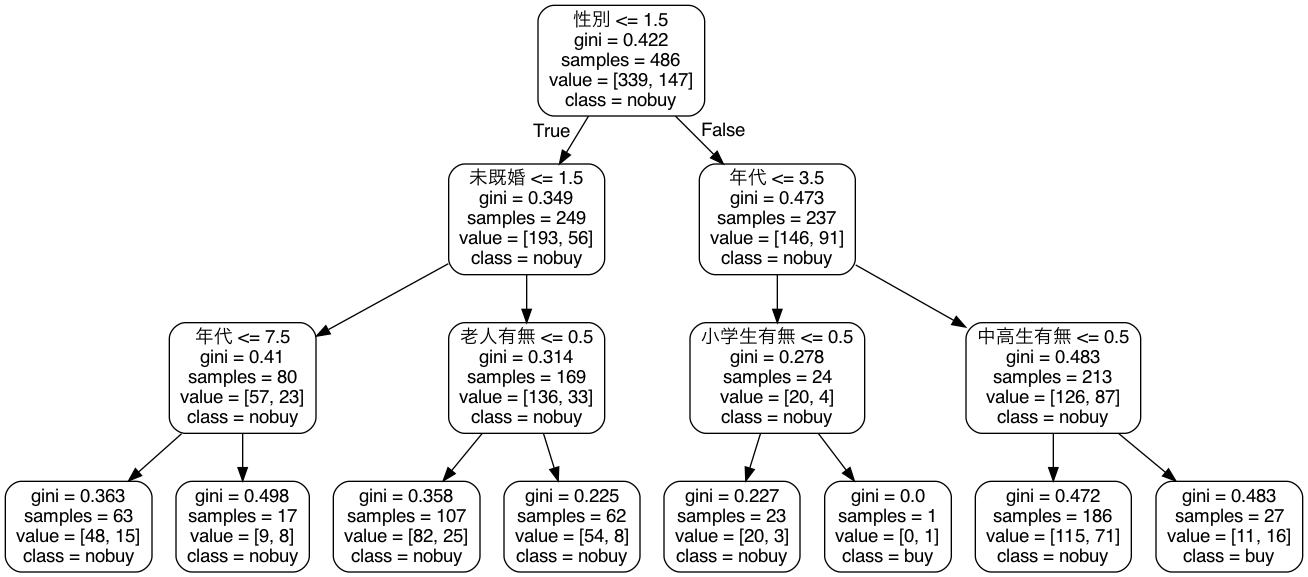

In [5]:
# 決定木グラフ表示のためのモジュール
import pydotplus
from IPython.display import Image
from graphviz import Digraph
import io

# 文字列を読み込める変数の生成
dot_data = io.StringIO()

# 得られた決定木をdotファイルに編集
dot_data = tree.export_graphviz(clf,  # 用いる結果
                                out_file=None,  # ファイルへの出力はなし
                                feature_names=X.columns,  # 説明変数名(日本語を使う場合)
                                class_names=['nobuy', 'buy'],  # 目的変数名（0, 1を変更）
                                rounded=True,  # ノードの角を丸くする
                                max_depth=3  # 表示する木の深さ
                                )

# dotファイルをPythonで読めるように取り出す
graph = pydotplus.graph_from_dot_data(dot_data)

# 日本語フォントの設定をするときは以下をコメントアウトする
graph.set_fontname('IPAGothic')
# ノードの日本語フォント設定
for node in graph.get_nodes():
    node.set_fontname('IPAGothic')
# エッジの日本語フォント設定
for e in graph.get_edges():
    e.set_fontname('IPAGothic')

# 画像ファイルを書き出す時は以下を実行
graph.write_pdf("out/nm_dt_result.pdf")  # pdfファイルの場合

# Jupyter Notebook上に決定木を表示
Image(graph.create_png())

In [6]:
# 精度の評価
from sklearn.metrics import accuracy_score
predicted = clf_res.predict(X)
print('Accuracy:', accuracy_score(y, predicted))

Accuracy: 0.7098765432098766


例題4.11

In [7]:
# 目的変数の設定
from sklearn.metrics import confusion_matrix
y = df_tree.iloc[:, 2]

# 説明変数の設定
X = df_tree.iloc[:, 3:]
# 説明変数をカテゴリ変数に変更
X = X.astype('category')

# 決定木の設定と実行（深さ10）
clf = tree.DecisionTreeClassifier(criterion='gini', max_depth=10)
clf_res = clf.fit(X, y)

# 精度の評価
conf_mat10 = pd.DataFrame(confusion_matrix(y, clf.predict(X)))
conf_mat10.index = ['観測=未購入', '観測=購入']
conf_mat10.columns = ['予測=未購入', '予測=購入']
conf_mat10

,予測=未購入,予測=購入
観測=未購入,317,22
観測=購入,83,64
